In [ ]:
import pandas as pd

df = pd.read_csv('/content/Form Help Requests - Réponses au formulaire 1 (1).csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.columns

Index(['Horodateur', 'ما هي احتياجاتك؟ (أضفها إذا لم يتم ذكرها)',
       'ما هي أقرب مدينة إليك؟ (أضفها إذا لم يتم ذكرها)',
       '  لأي  جماعة / قيادة / دوار تنتمون ؟',
       'هل يمكنك تقديم الإحداثيات الدقيقة للموقع؟ (ادا كنت لا توجد بعين المكان) متلاً \n31.01837503440344, -6.781405948842175',
       'الرجاء الضغط على الرابط التالي لمعرفة موقعك إذا كان متاحا',
       'هل توجد بعين المكان؟', 'العنوان أو اسم القرية (عند الامكان)',
       '(عند الامكان) رقم هاتف شخص موجود في عين المكان',
       '(إختياري) هل يمكنك أن تعطينا المزيد من المعلومات حول الوضع؟',
       'مصدر المعلومات (إختياري)', 'Status', 'GeoStamp', 'GeoCode',
       'GeoAddress',
       'هل يمكنك تقديم الإحداثيات الدقيقة للموقع؟ (ادا كنت لا توجد بعين المكان) متلاً \n31.01837503440344, -6.781405948842175.1',
       'Verified', 'GeoStamp.1', 'GeoCode.1', 'GeoAddress.1', 'GeoStamp.2',
       'GeoCode.2', 'GeoAddress.2'],
      dtype='object')

In [ ]:
columns_to_keep = ['ما هي احتياجاتك؟ (أضفها إذا لم يتم ذكرها)', 'ما هي أقرب مدينة إليك؟ (أضفها إذا لم يتم ذكرها)','  لأي  جماعة / قيادة / دوار تنتمون ؟','العنوان أو اسم القرية (عند الامكان)','(إختياري) هل يمكنك أن تعطينا المزيد من المعلومات حول الوضع؟']
df_copy = df[columns_to_keep]

In [ ]:
df_copy.head()

,ما هي احتياجاتك؟ (أضفها إذا لم يتم ذكرها),ما هي أقرب مدينة إليك؟ (أضفها إذا لم يتم ذكرها),لأي جماعة / قيادة / دوار تنتمون ؟,العنوان أو اسم القرية (عند الامكان),(إختياري) هل يمكنك أن تعطينا المزيد من المعلومات حول الوضع؟
0,طعام وماء,تارودانت,دوار سيدي حساين,NaN,NaN
1,إغاثة,مراكش,سيدي حساين,NaN,NaN
2,إغاثة,الصويرة,الصويرة,NaN,NaN
3,إغاثة,تارودانت,دوار تولكين جماعة أزكور,NaN,NaN
4,إغاثة,مراكش,إمنتكن جماعة إمولاس موتطريرة,NaN,كل الدواوير الموجودة في تلك المنطقة مهدمة : \n...


In [ ]:
df_copy.shape

(1949, 5)

In [ ]:
df_copy['ما هي احتياجاتك؟ (أضفها إذا لم يتم ذكرها)'].isnull().sum()

288

In [ ]:
df_copy = df_copy.dropna(subset=['ما هي احتياجاتك؟ (أضفها إذا لم يتم ذكرها)'])
df_copy = df_copy.reset_index(drop=True)

In [ ]:
df_copy.shape

(1661, 5)

In [ ]:
unique_categories_needs = df_copy['ما هي احتياجاتك؟ (أضفها إذا لم يتم ذكرها)'].unique()
unique_categories_needs

array(['طعام وماء', 'إغاثة', 'و مأوى و مساعدة طبية', 'مأوى', 'Tous',
       'مساعدة طبية', 'إغاثة, مساعدة طبية, مأوى, طعام وماء',
       'مأوى, طعام وماء, Clothing', 'مأوى, طعام وماء',
       'مساعدة طبية, مأوى, طعام وماء, مخاطر (تسرب الغاز، تلف في الخدمات العامة...)',
       'مساعدة طبية, مأوى, طعام وماء', 'Tous ', 'مساعدة طبية, مأوى',
       'مأوى, طعام وماء, مخاطر (تسرب الغاز، تلف في الخدمات العامة...)',
       'إصلاح البنية التحتية لمقاومة الزلازل و الكوارث الطبيعية و توفير سكن لائق للقرى والمناطق الجبلية التي تسكن في دور من الطين حيث انه لظي معلومات حول المناطق التي تبني بيوتها من طين وذلك راجع كون السلطات تمنعهم من البناء الحضري و البناء بالحجر بل يتم اجبارهم على اابناء بالطين وذلك لاستقطاب السياح كون ان الغرض من السياح لزيارة تلك المناطق هو رؤية الساكنة التي تسكن في منازل من طين وتراب لذا يتم منع الساكنة من البناء الحضري (الساس و لبريك) وذلك لاستقطاب السياحة الاجنبية هذا ما نحتاجه في المغرب وكذا توفير تعليم لائق ومستشفيات قاظرة على استيعاب ضحايا الكوارث الطبيعية و كذا قاظرة على 

In [ ]:
df_copy = df_copy.rename(columns={'ما هي احتياجاتك؟ (أضفها إذا لم يتم ذكرها)': 'Needs'})
df_copy = df_copy.rename(columns={'  لأي  جماعة / قيادة / دوار تنتمون ؟': 'Douar'})

In [ ]:
def insert_space(text):
    return text.replace('وماء', 'و ماء')

In [ ]:
df_copy['Needs'] = df_copy['Needs'].apply(insert_space)

#Text preprocessing ( needs )

### Language detection


In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

In [ ]:
df_copy['language'] = df_copy['Needs'].apply(detect_language)

### Spell-Checking


In [ ]:
from spellchecker import SpellChecker
import arabic_reshaper

# Create an instance of SpellChecker for each language
spell_en = SpellChecker()
spell_fr = SpellChecker()

# Create a new column and initialize it with an empty string in df_copy
df_copy['corrected_needs'] = ''

# Function to detect and correct language
def detect_and_correct_language(row):
    try:
        language = row['language']
        text = row['Needs']

        # Apply language-specific correction
        if language == 'en':
            words = text.split()
            corrected_text = [spell_en.correction(word) for word in words]
            corrected_text = " ".join(corrected_text)
        elif language == 'fr':
            words = text.split()
            corrected_text = [spell_fr.correction(word) for word in words]
            corrected_text = " ".join(corrected_text)
        elif language == 'ar':
            # For Arabic, apply normalization and correction without reversing text direction
            normalized_arabic = arabic_reshaper.reshape(text)
            corrected_text = normalized_arabic
        else:
            # if Unsupported language, keep the original text
            corrected_text = text

        return corrected_text
    except Exception as e:
        # In case of errors in language detection or correction, keep the original text
        return row['corrected_needs']

# Apply the function to create a new column "corrected_needs" in df_copy
df_copy['corrected_needs'] = df_copy.apply(detect_and_correct_language, axis=1)

###Translation to arabic

In [ ]:
from googletrans import Translator

def translate_text_to_arabic(text, target_language='ar'):
    try:
        translator = Translator()
        words = text.split()  # Split the text into words
        translated_words = [translator.translate(word, dest=target_language).text for word in words]
        translated_text = ' '.join(translated_words)  # Join the translated words back into a sentence
        return translated_text
    except:
        return text  # Return the original text if translation fails

# Apply translation to non-Arabic texts
df_copy['translated_needs'] = df_copy['Needs'].apply(lambda text: translate_text_to_arabic(text, 'ar'))


#NEEDS Analysis

###Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Load your data into a pandas DataFrame
data = pd.Series(df_copy['translated_needs'])  # Replace with your data

# Tokenize the text
nltk.download('punkt')
data = data.apply(word_tokenize)

# Define your personalized stop words
custom_stop_words = ["الأطفال", "ورجال", "النساء", "لديهم", "والأطفال", "شيء", "انت","هالها"]

# Remove stopwords, punctuation, and personalized stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))
data = data.apply(lambda tokens: [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words and word.lower() not in custom_stop_words])

# Flatten the list of tokens
all_tokens = [token for tokens in data for token in tokens]

# Define a list of bigrams to prevent from being tokenized
forbidden_bigrams = [
    "مساعدة طبية", "مساعدة غذائية",
    "إمدادات مياه", "مواد تنظيف", "أجهزة اتصال", "مرافق صحية",
    "مواد بناء ", "دعم نفسي", "إعادة تأهيل", "مواد إسعاف",
    "إمدادات إغاثة", "مساكن مؤقتة", "مساعدة إنسانية",
    "معدات نقل", "مياه صالحة للشرب", "مواد غذائية", "ملابس أطفال",
    "معدات طبية","السكن الائق","مواد الغذائية","المواد الغذائية" ,"مواد الغدائية"
]

# Merge the forbidden bigrams back together in the list of tokens
merged_tokens = []
i = 0
while i < len(all_tokens):
    token = all_tokens[i]
    if i < len(all_tokens) - 1:
        bigram = token + " " + all_tokens[i + 1]
        if bigram in forbidden_bigrams:
            merged_tokens.append(bigram)
            i += 2  # Skip the next token
        else:
            merged_tokens.append(token)
            i += 1
    else:
        merged_tokens.append(token)
        i += 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove 'ال' from tokens
merged_tokens = [token.replace('ال', '') if token.startswith('ال') else token for token in merged_tokens]

###Word Frequency Analysis


In [ ]:
# Calculate word frequencies
word_freq = Counter(merged_tokens)

# Most common words
most_common = dict(word_freq.most_common(10))

# Least common words
least_common = dict(word_freq.most_common()[:-20:-1])


In [ ]:
least_common

{'غذئية': 1,
 'سير': 1,
 'خياام': 1,
 'وتيد': 1,
 'وبوطة': 1,
 'مطبخ': 1,
 'مومو': 1,
 'غذاىية': 1,
 'قطاني': 1,
 'أطعمة': 1,
 'والأدوية': 1,
 'بطاطس': 1,
 'كالبصل': 1,
 'أحتاج': 1,
 'غذائيه': 1,
 'سكن ائق': 1,
 'ألبسة': 1,
 'حصول': 1,
 'بالسقوط': 1}

In [ ]:
most_common

{'مأوى': 1237,
 'طعام': 757,
 'ماء': 751,
 'مساعدة طبية': 310,
 'إغاثة': 307,
 'خيام': 103,
 'الخيام': 79,
 'مخاطر': 72,
 'تسرب': 70,
 'تلف': 70}

### Most and Least Common NEEDS



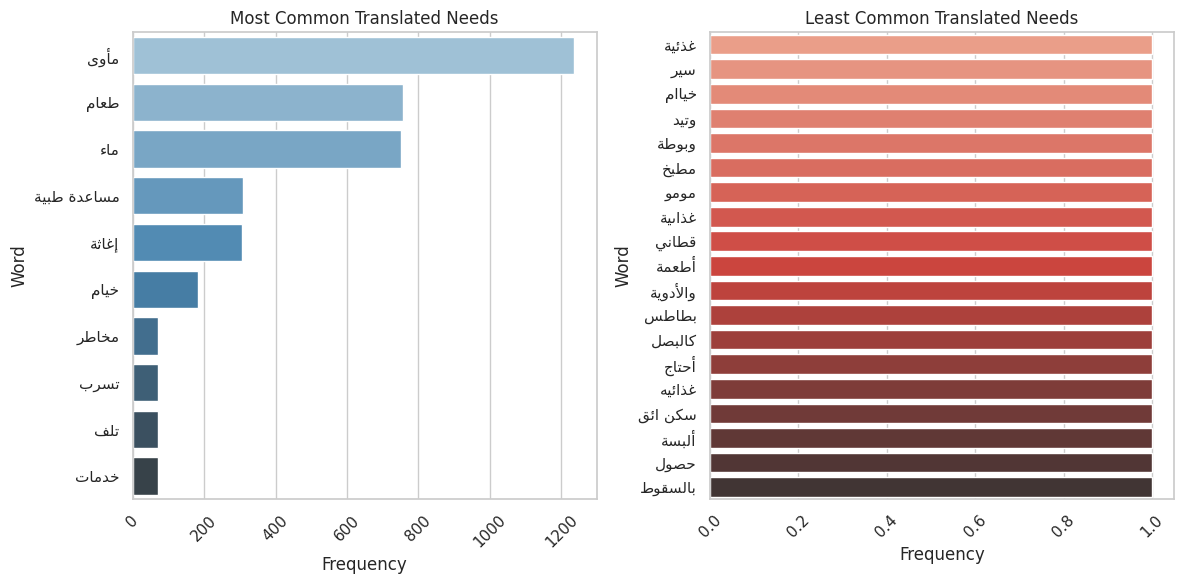

In [ ]:
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
%matplotlib inline

# Reshape and display Arabic text
most_common_res = {get_display(arabic_reshaper.reshape(k)): v for k, v in most_common.items()}
least_common_res = {get_display(arabic_reshaper.reshape(k)): v for k, v in least_common.items()}

# Create DataFrames for most common and least common needs
df_most_common = pd.DataFrame(most_common_res.items(), columns=['word', 'count'])
df_least_common = pd.DataFrame(least_common_res.items(), columns=['word', 'count'])

# Create bar plots for most common and least common needs
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Most common needs
plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=df_most_common, palette="Blues_d")
plt.title('Most Common Translated Needs')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.xticks(rotation=45)

# Least common needs
plt.subplot(1, 2, 2)
sns.barplot(x="count", y="word", data=df_least_common, palette="Reds_d")
plt.title('Least Common Translated Needs')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### frequency distribution

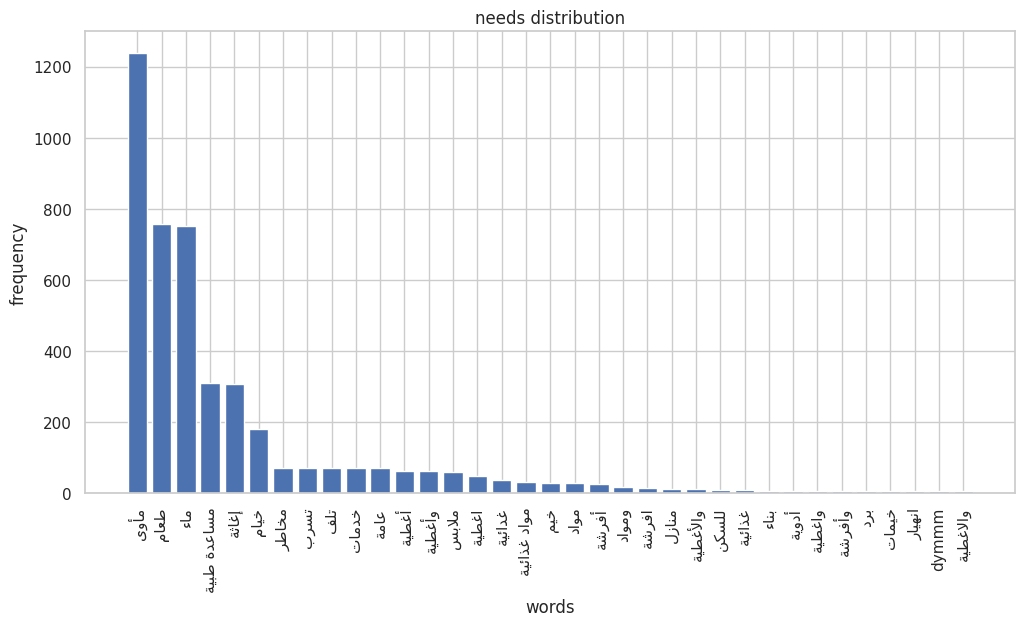

In [ ]:
from collections import Counter

# Create a Counter object to count word frequencies
word_freq = Counter(merged_tokens)

# Extract the top N words and their frequencies
top_words = word_freq.most_common(35)  # You can adjust this number

# Extract words and frequencies separately
words, frequencies = zip(*top_words)

# Reshape and reorder Arabic words for proper display
reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word in words]

# Plot the word frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(reshaped_words, frequencies)
plt.title('needs distribution')
plt.xlabel("words")
plt.ylabel('frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


###word cloud


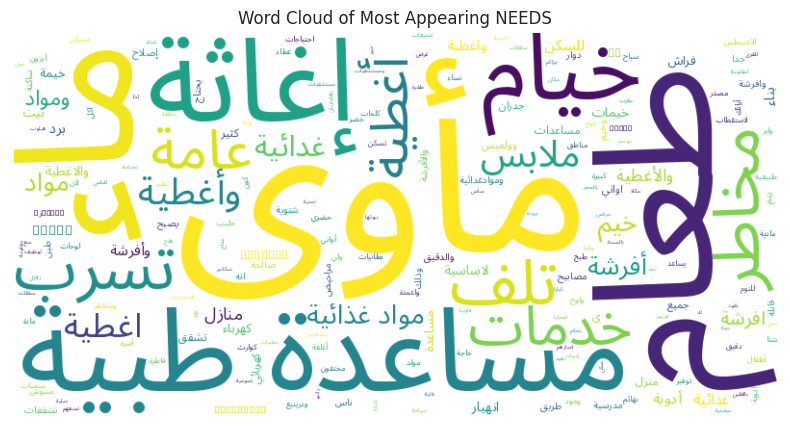

In [ ]:

# Calculate word frequencies from all the tokens ( last time we did it only for most and least)
word_frequencies = Counter(merged_tokens)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='/content/NotoSansArabic-VariableFont_wdth,wght.ttf'
).generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(get_display('Word Cloud of Most Appearing NEEDS'))
plt.show()


#Topic modeling



In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
merged_toc=[merged_tokens]
# Create a dictionary from your preprocessed tokens
dictionary = corpora.Dictionary([merged_tokens])

# Create a corpus (bag of words)
corpus = [dictionary.doc2bow(tokens) for tokens in merged_toc]

# Create an LDA model with a specified number of topics
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.002*"مأوى" + 0.002*"طعام" + 0.002*"ماء" + 0.002*"إغاثة" + 0.002*"مساعدة طبية"')
(1, '0.006*"طعام" + 0.006*"مأوى" + 0.006*"ماء" + 0.003*"مساعدة طبية" + 0.003*"إغاثة"')
(2, '0.005*"مأوى" + 0.005*"طعام" + 0.004*"ماء" + 0.003*"إغاثة" + 0.003*"خيام"')
(3, '0.002*"طعام" + 0.002*"مأوى" + 0.002*"ماء" + 0.002*"إغاثة" + 0.002*"مساعدة طبية"')
(4, '0.004*"طعام" + 0.004*"مأوى" + 0.004*"ماء" + 0.003*"إغاثة" + 0.003*"مساعدة طبية"')
(5, '0.003*"مأوى" + 0.003*"طعام" + 0.003*"ماء" + 0.003*"إغاثة" + 0.002*"مساعدة طبية"')
(6, '0.242*"مأوى" + 0.148*"طعام" + 0.147*"ماء" + 0.061*"مساعدة طبية" + 0.060*"إغاثة"')
(7, '0.003*"مأوى" + 0.003*"ماء" + 0.003*"طعام" + 0.002*"إغاثة" + 0.002*"مساعدة طبية"')
(8, '0.005*"مأوى" + 0.003*"طعام" + 0.003*"ماء" + 0.003*"إغاثة" + 0.003*"مساعدة طبية"')
(9, '0.002*"مأوى" + 0.002*"ماء" + 0.002*"طعام" + 0.002*"إغاثة" + 0.002*"مساعدة طبية"')


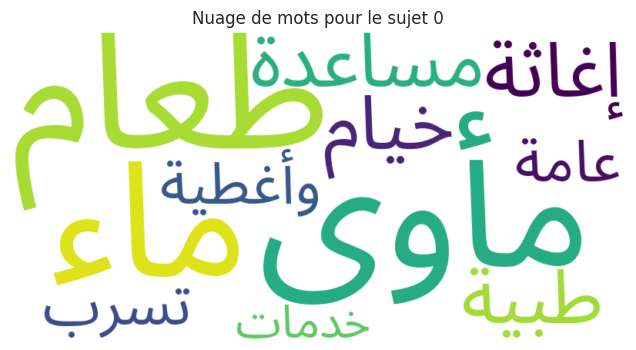

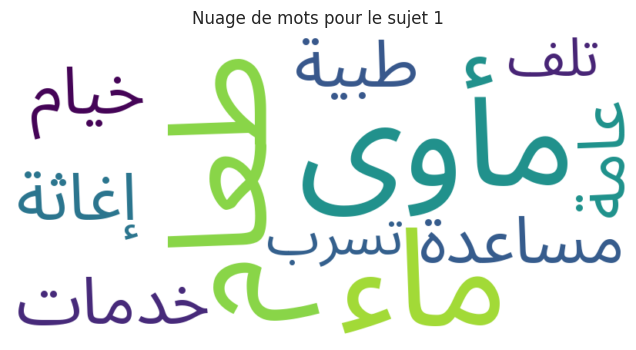

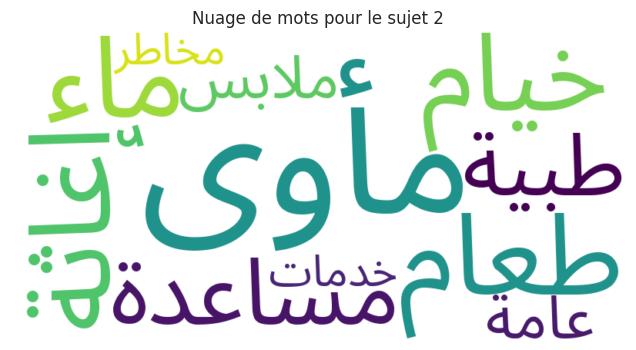

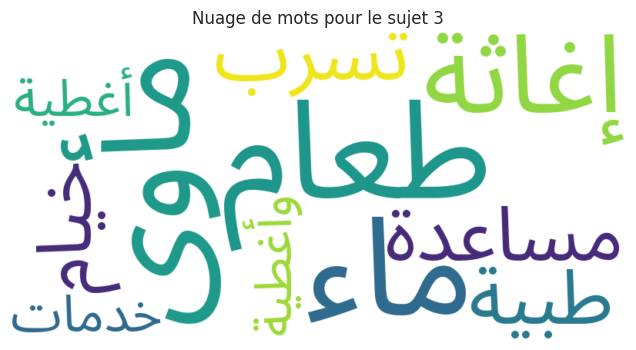

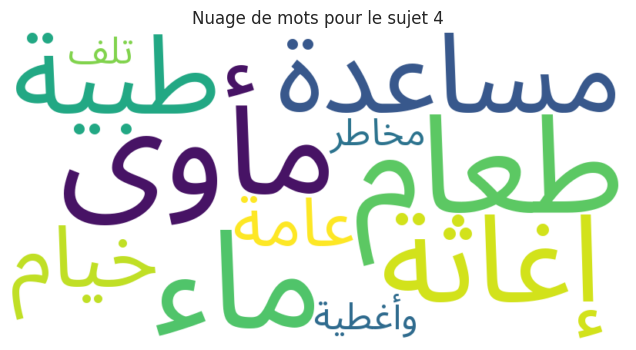

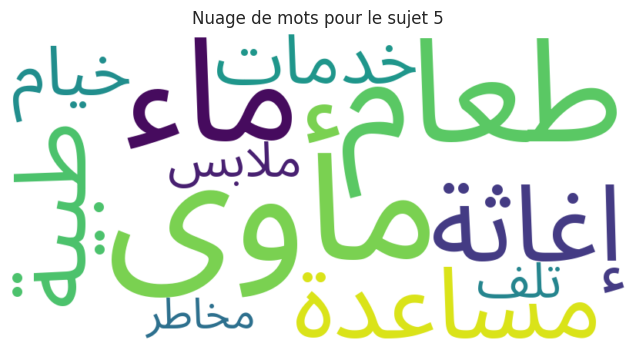

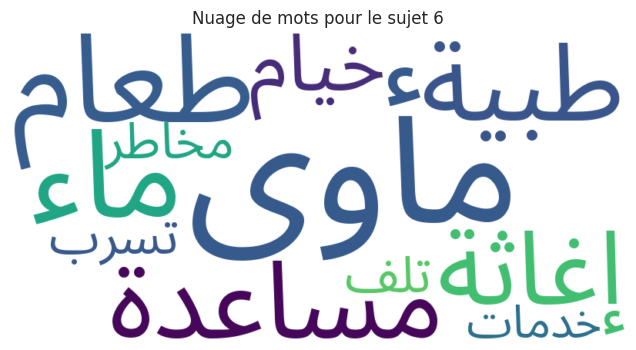

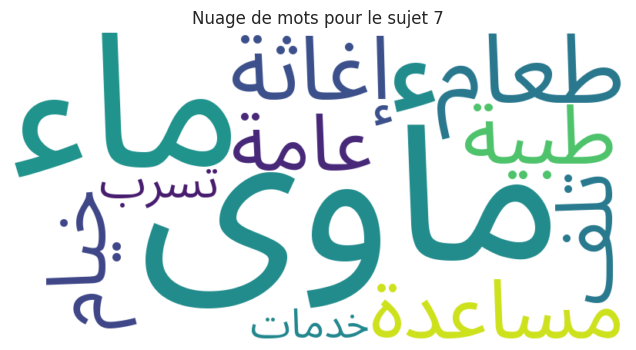

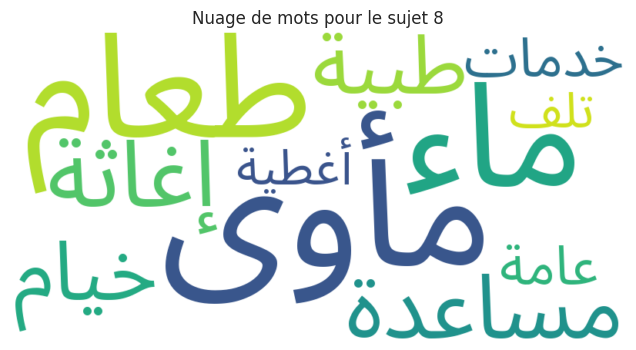

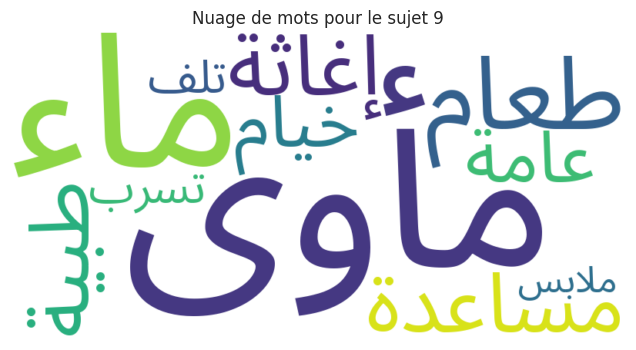

In [ ]:

topics = lda_model.print_topics(num_words=10)  # Récupérer les mots clés de chaque sujet

# Créer un nuage de mots pour chaque sujet
for topic_num, topic_words in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white',font_path='/content/NotoSansArabic-VariableFont_wdth,wght.ttf').generate(topic_words)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Nuage de mots pour le sujet {topic_num}")
    plt.axis('off')
    plt.show()

